In [9]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split  

In [10]:
#define converts(字典)  
def Iris_label(s):  
    it={b'Iris-setosa':0, b'Iris-versicolor':1, b'Iris-virginica':2 }  
    return it[s]  
#定义的转换函数为：将类别Iris-setosa，Iris-versicolor，Iris-virginica映射成0,1,2

In [11]:
#1.读取数据集
##用loadtxt函数读取函数，其声明如下：
path='C:/Users/米/Iris.data'
data=np.loadtxt(path,dtype=float,delimiter=',',converters={4:Iris_label})
#converters={4:Iris_label}中“4”指的是第5列：将第5列的str转化为label(number)
#常用的参数:
#fname:文件路径
#dtype：样本的数据类型
#delimiter：分隔符
#converters：将数据列与转换函数进行映射的字典。
#例 converters={4:Iris_label}含义是将第5列的数据对应转换函数进行转换。
#usecols：选取数据的列

In [12]:
#2.划分数据与标签  
x,y=np.split(data,indices_or_sections=(4,),axis=1) #x为数据，y为标签  
x=x[:,0:2]  #为便于后边画图显示，只选取前两维度。如果不画图，可以选前四列x[:,0:4]
train_data,test_data,train_label,test_label =train_test_split(x,y, random_state=1, train_size=0.6,test_size=0.4) #sklearn.model_selection.  
#print(train_data.shape)  
#1、split（数据分割位置，轴=1（水平分割） 0（垂直分割））
#2、sklearn.model_selection.train_test_split随机划分训练集与测试集
#train_test_split(train_data,train_label,test_size=数字，random_state=0）
#参数解释：
#train_data:所要划分的样本特征集
#train_label:所要划分的样本类别
#test_size：样本占比，如果是整数的话就是样本的数量。
#注意：
    #test_size：测试样本占比。默认情况下，该值设置为0.25。默认值将在版本.0.21中更改。只有train_size没有指定时，
            #它将保持0.25，否则它将补充指定的train_size，例如train_size=0.6，则test_size默认为0.4
    #train_size：训练样本占比
    #random_state：是随机数的种子
    
    #随机数种子：其实就是该随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你名称都填1，
    #其它参数一样的情况下你得到的随机数是一样的 。但填0或不填，每次都会不一样。随机数的参数取决于种子，随机数
    #和种子之间的关系从以下两个规则：种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数
    


In [13]:
#3.训练svm分类器  
classifier=svm.SVC(C=2,kernel='rbf',gamma=10,decision_function_shape='ovo') # ovr:一对多策略  
classifier.fit(train_data,train_label.ravel()) #ravel函数在降维时默认是行序优先  

#kernel=‘linear’时，为线性核，C越大分类效果越好，但有可能会过拟合（defaul C=1）
#kernel=‘rbf’时（default），为高斯核，gamma值越小，分类界面越连续；gamma值越大，分类界面越散，分类效果越好，但有可能过拟合
#decision_function_shape='ovr'时，为one v rest （一对多），即一个类别与其他类别进行划分
#decision_function_shape='ovo'时，为one v one （一对一），即将类别两两之间进行划分，用二分类的方法模拟多分类的结果

SVC(C=2, decision_function_shape='ovo', gamma=10)

In [14]:
#4.计算svc分类器的准确率  
print("训练集：",classifier.score(train_data,train_label))  
print("测试集：",classifier.score(test_data,test_label))

训练集： 0.8555555555555555
测试集： 0.7


In [15]:
#另一种计算准确率的方法：
#也可直接调用accuracy_score方法计算准确率  
from sklearn.metrics import accuracy_score  
tra_label=classifier.predict(train_data) #训练集的预测标签  
tes_label=classifier.predict(test_data) #测试集的预测标签  
print("训练集：", accuracy_score(train_label,tra_label) )  
print("测试集：", accuracy_score(test_label,tes_label) )  

训练集： 0.8555555555555555
测试集： 0.7


In [16]:
#可以查看一下内部决策函数，返回的是样本到分类超平面的距离
#查看决策函数  
print('train_decision_function:\n',classifier.decision_function(train_data)) # (90,3)  
print('predict_result:\n',classifier.predict(train_data))

train_decision_function:
 [[ 1.00809313  1.01540937  0.151101  ]
 [-1.00777232 -1.00008021  0.63444159]
 [-0.99416388 -1.06070485 -0.681607  ]
 [ 1.0000563   1.00031087  0.05426675]
 [ 1.01709573  1.02782828  0.14377175]
 [-0.94393468 -1.02064785 -1.00008844]
 [ 0.99963476  1.00001849  0.15117146]
 [-0.96836014 -0.99980535  0.58258857]
 [-0.57544729 -1.05719931 -1.38921374]
 [-0.99957828 -1.07645757 -0.44947688]
 [-1.06076059 -1.12561405  1.00935269]
 [-0.61824976 -1.00025184 -0.99988863]
 [-1.04911984 -1.01738974  0.82720369]
 [ 1.0004868   0.99973226  0.15150631]
 [-0.99959974 -0.27106766  1.00008043]
 [-1.00037028 -1.0072383  -0.79454   ]
 [-0.94393468 -1.02064785 -1.00008844]
 [-1.16901646 -0.68521942  0.99969349]
 [-0.36188214 -1.05474156 -1.22681095]
 [-0.99998921 -0.7292288   1.00000149]
 [ 0.9997492   1.00028017  0.16527647]
 [ 1.10037424  1.1294864   0.11662767]
 [ 0.99999492  1.0000862   0.15138041]
 [-0.61824976 -1.00025184 -0.99988863]
 [ 1.08355223  1.08507103  0.1424095 ]

In [17]:
#5.绘制图形  
#确定坐标轴范围  
#鸢尾花SVM二特征分类
x1_min, x1_max=x[:,0].min(), x[:,0].max() #第0维特征的范围  
x2_min, x2_max=x[:,1].min(), x[:,1].max() #第1维特征的范围  
x1,x2=np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j ] #生成网络采样点  
grid_test=np.stack((x1.flat,x2.flat) ,axis=1) #测试点  
#指定默认字体  
matplotlib.rcParams['font.sans-serif']=['SimHei']  
#设置颜色  
cm_light=matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])  
cm_dark=matplotlib.colors.ListedColormap(['g','r','b'] )  
  
grid_hat = classifier.predict(grid_test)       # 预测分类值  
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同 

D:\lqs_anzhuang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


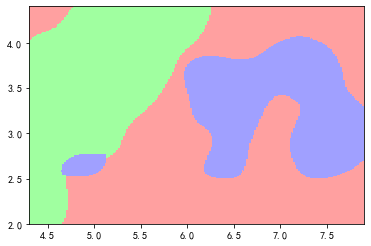

In [18]:
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示 

D:\lqs_anzhuang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


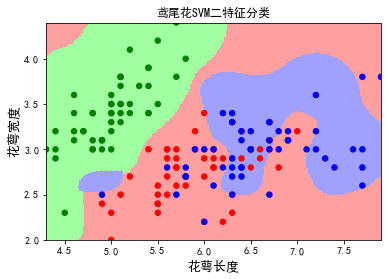

In [19]:
#所有样本的分类结果
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示  
plt.scatter(x[:, 0], x[:, 1], c=y[:,0], s=30,cmap=cm_dark)  # 样本  
#plt.scatter(test_data[:,0],test_data[:,1], c=test_label[:,0],s=30,edgecolors='k', zorder=2,cmap=cm_dark) #圈中测试集样本点  
plt.xlabel('花萼长度', fontsize=13)  
plt.ylabel('花萼宽度', fontsize=13)  
plt.xlim(x1_min,x1_max)  
plt.ylim(x2_min,x2_max)  
plt.title('鸢尾花SVM二特征分类')  
plt.show() 

D:\lqs_anzhuang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


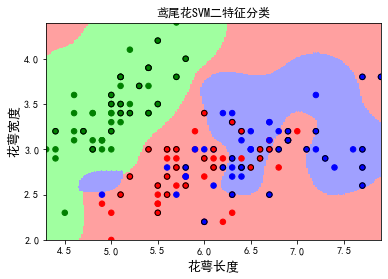

In [19]:

#将测试点从中圈出
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示  
plt.scatter(x[:, 0], x[:, 1], c=y[:,0], s=30,cmap=cm_dark)  # 样本  
plt.scatter(test_data[:,0],test_data[:,1], c=test_label[:,0],s=30,edgecolors='k', zorder=2,cmap=cm_dark) #圈中测试集样本点  
plt.xlabel('花萼长度', fontsize=13)  
plt.ylabel('花萼宽度', fontsize=13)  
plt.xlim(x1_min,x1_max)  
plt.ylim(x2_min,x2_max)  
plt.title('鸢尾花SVM二特征分类')  
plt.show() 